# Prepare ToC

- [TF-IDF testing](#TFIDF-Testing)</BR>



In [1]:
import importlib
import os
from joblib import dump, load

import numpy as np
import pandas as pd

import ml.explo as mlexplo
import ml.prepare as mlprepare

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt

data_path = "..\\data\\stackoverflow\\"
model_path = data_path + "models\\"

np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# # data_filename = "bs4_nltk.pkl"
# data_filename = "nltk_token_stem.pkl"
# df_base = pd.read_pickle(data_path + data_filename)

In [3]:
# df = df_base[:10000].copy(deep=True)
# df = df_base.copy(deep=True)

In [6]:
# df

,Title,Body
0,"[determin, smallest, common, divisor, string]","[ask, follow, question, job, interview, stump,..."
1,"[use, trait, object, contain, method, return, ...","[correct, way, use, trait, object, contain, me..."
2,"[name, function, declar, hoist, put, insid, re...","[put, function, declar, besid, return, stateme..."
3,"[get, valu, input, caus, flicker, react]","[attempt, track, valu, two, login, input, fiel..."
4,"[assign, vector, atom, type]","[assign, member, vector, atom, type, https, wa..."
...,...,...
49995,"[nullreferenceexcept, simpleinjector, contain,...","[still, process, get, wpf, also, decid, give, ..."
49996,"[add, grid, line, catplot, seaborn]","[add, grid, line, vertic, horizont, catplot, f..."
49997,"[standard, deviat, data, meet, two, condit, ex...","[tri, calcul, standard, deviat, data, point, m..."
49998,"[proper, rais, except, tensorflow, graph]","[want, rais, except, depend, valu, input, tens..."


In [4]:
# def filter_top_tags(df, column, count=10, default=None):
#     top_tags = mlprepare.prepare_multi_label(df,'Tags')[:count]
#     ret = df[column].apply(lambda cell: [x for x in cell if x in top_tags])
#     if default:
#         ret = ret.apply(lambda cell: cell if len(cell)>0 else ['other'])
#     return ret


# def prepare_baseline_ys(df, tags):
#     ret =  dict({})
#     for tag in tags.index:
#         sr_tag = df['Tags'].copy(deep=True)
#         sr_tag = sr_tag.apply(lambda x: 1 if tag in x else 0)
#         ret[tag] = sr_tag
#     return ret

In [7]:
# create_baseline = True
# if(create_baseline):
#     df['Tags_T50'] = filter_top_tags(df,'Tags', count=50, default='other')
#     df['Tags_T10'] = filter_top_tags(df,'Tags', count=10, default='other')
#     df.to_pickle(data_path + 'bs4_nltk_Tags.pkl')
# else:
df_top = pd.read_pickle(data_path + 'Top_Tags.pkl')

In [10]:
df_top

,Tags_T100,Tags_T50,Tags_T10
0,"[string, algorithm]",[string],[other]
1,[rust],[other],[other]
2,[javascript],[javascript],[javascript]
3,"[javascript, css, reactjs]","[javascript, css, reactjs]",[javascript]
4,"[c++, multithreading, c++11]",[c++],[c++]
...,...,...,...
49995,[c#],[c#],[c#]
49996,[python],[python],[python]
49997,[excel],[excel],[other]
49998,"[python, python-3.x, tensorflow]","[python, python-3.x]","[python, python-3.x]"


In [7]:
# tags = mlprepare.prepare_multi_label(df,'Tags')
# y_dict = prepare_baseline_ys(df,tags)
# dump(y_dict, data_path + 'y_dict_top50.joblib')

['..\\data\\stackoverflow\\y_dict_top50.joblib']

In [14]:
# mlb = MultiLabelBinarizer()
# mlb.fit_transform(df['Tags'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
mlb.classes_ 

array(['android', 'angular', 'arrays', 'asp.net-core', 'azure', 'bash',
       'c', 'c#', 'c++', 'css', 'dataframe', 'dictionary', 'django',
       'dplyr', 'excel', 'firebase', 'flutter', 'ggplot2', 'git',
       'google-sheets', 'html', 'ios', 'java', 'javascript', 'jquery',
       'json', 'kotlin', 'laravel', 'list', 'mongodb', 'mysql', 'node.js',
       'numpy', 'oracle', 'other', 'pandas', 'php', 'postgresql',
       'powershell', 'python', 'python-3.x', 'r', 'reactjs', 'regex',
       'sql', 'sql-server', 'string', 'swift', 'swiftui', 'typescript',
       'vue.js'], dtype=object)

In [7]:
# df_full = df_base.copy(deep=True)
# df_only = df_base[df_base['Tags'].apply(lambda x: x!=['other'])].copy(deep=True)

In [10]:
# title_corpus = [' '.join(map(str, w)) for w in df['Title'].tolist()]
# dump(title_corpus, data_path + 'title_corpus.joblib')

# title_vectorizer = TfidfVectorizer(ngram_range=(1,1))
# title_vectorizer.fit(title_corpus)
# dump(title_vectorizer, model_path + 'title_vectorizer.joblib')

['..\\data\\stackoverflow\\models\\title_vectorizer.joblib']

In [12]:
# body_corpus = [' '.join(map(str, w)) for w in df['Body'].tolist()]
# dump(body_corpus, data_path + 'body_corpus.joblib')

['..\\data\\stackoverflow\\body_corpus.joblib']

In [11]:


# body_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=1000)
# body_vectorizer.fit(body_corpus)
# dump(body_vectorizer, model_path + 'body_vectorizer_11.joblib')

['..\\data\\stackoverflow\\models\\body_vectorizer_11.joblib']

In [12]:
# body_vectorizer2 = TfidfVectorizer(ngram_range=(1,2), max_features=2000)
# body_vectorizer2.fit(corpus_body)
# dump(body_vectorizer2, model_path + 'body_vectorizer_12.joblib')

['..\\data\\stackoverflow\\models\\body_vectorizer_12.joblib']

In [16]:
# body_vectorizer3 = TfidfVectorizer(ngram_range=(1,3), max_features=4000)
# body_vectorizer3.fit(body_corpus)
# dump(body_vectorizer3, model_path + 'body_vectorizer_13.joblib')

['..\\data\\stackoverflow\\models\\body_vectorizer_13.joblib']

In [19]:
len(body_vectorizer3.vocabulary_.keys())

678158

In [8]:
words = word_tokenize(
#     [' '.join([' '.join(map(str, w)) for w in df['Tags'].tolist()])][0]
     [' '.join(corpus_tags)][0]
)
fdist = FreqDist(words)

NameError: name 'corpus_tags' is not defined

In [53]:
df_graph = pd.DataFrame.from_dict(fdist, orient='index').sort_values(by=0, ascending=False)
df_graph.columns = ['count']

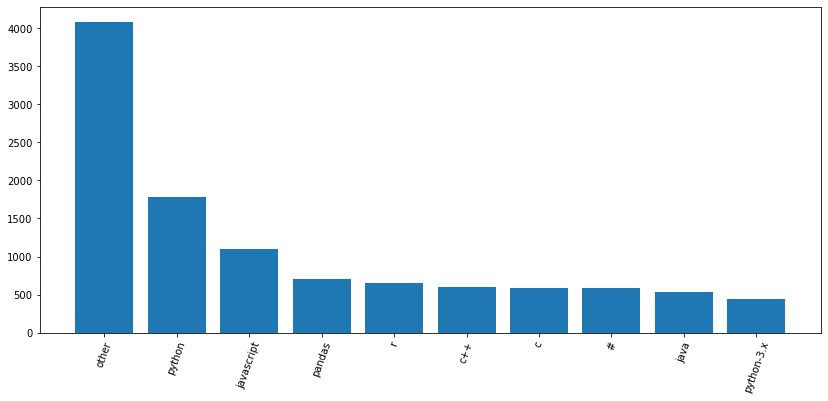

In [54]:
# df_graph = df_graph.sort_values(by='count', ascending=False)[:50]
limit = 10
fig, ax = plt.subplots(figsize = (14,6))
#sns.histplot(data=col1, ax=ax, color=graph_color)
ax.bar(df_graph.index[:limit], df_graph['count'][:limit])
# ax.set_ylabel(ylabel, size = 14)
# ax.set_title(title, size = 18)
plt.xticks(rotation=70)
plt.show()

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
# vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus_tags)
print(vectorizer.get_feature_names())
print(X.shape)

['11', 'access', 'activity', 'ajax', 'algorithm', 'amazon', 'android', 'angular', 'angularjs', 'animation', 'ansible', 'apache', 'api', 'apps', 'architecture', 'array', 'arraylist', 'arrays', 'asp', 'assembly', 'async', 'asynchronous', 'authentication', 'autocomplete', 'await', 'awk', 'aws', 'azure', 'bash', 'beautifulsoup', 'binding', 'bluetooth', 'boost', 'boot', 'bootstrap', 'build', 'by', 'cassandra', 'casting', 'charts', 'checkbox', 'chrome', 'class', 'clojure', 'cloud', 'cmake', 'cmd', 'code', 'collections', 'compilation', 'compiler', 'concurrency', 'constructor', 'controller', 'cookies', 'core', 'count', 'css', 'csv', 'd3', 'dart', 'data', 'database', 'dataframe', 'datagrid', 'date', 'datetime', 'debugging', 'deep', 'delphi', 'dependency', 'deployment', 'design', 'devops', 'dictionary', 'directory', 'django', 'docker', 'dom', 'dplyr', 'ec2', 'ecmascript', 'elasticsearch', 'eloquent', 'encoding', 'encryption', 'entity', 'enums', 'error', 'errors', 'events', 'excel', 'express', 'e

# TFIDF Testing

Rebuilding ingest adding few variables like seller lat and lng  
For analysis purpose

- [ToC](#Prepare-ToC)</BR>

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

df = df_base[:10].copy(deep=True)
corpus_title = [' '.join(map(str, w)) for w in df['Title'].tolist()]


In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_title)
print(vectorizer.get_feature_names())

['app', 'array', 'assign', 'atom', 'base', 'caus', 'choic', 'common', 'contain', 'count', 'cran', 'declar', 'determin', 'divisor', 'docker', 'filter', 'first', 'flicker', 'format', 'function', 'get', 'hoist', 'import', 'input', 'insid', 'inspect', 'key', 'map', 'method', 'name', 'network', 'object', 'packag', 'poll', 'put', 'react', 'refer', 'return', 'row', 'self', 'smallest', 'specif', 'sql', 'statement', 'store', 'string', 'subqueri', 'trait', 'troubl', 'type', 'use', 'valu', 'vector', 'vote', 'work']


In [24]:
print(X.toarray())
print(X.shape)

[[0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
  1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0
  0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 2 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 

In [25]:
tfid = TfidfTransformer()

In [27]:
X_new = tfid.fit_transform(X)

In [29]:
X_new.toarray()

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 0.  , 0.  , 0.  ,
        0.  , 0.45, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 0.  , 0.  , 0.  ,
        0.  , 0.45, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.  , 0.33, 0.  ,
        0.  , 0.  , 0.  , 0.39, 0.33, 0.  , 0.39, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.39, 0.  , 0.  , 0.29, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.37, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.37,
        0.  , 0.  , 0.37, 0.  , 0.  , 0.  , 0.  , 0.31, 0.  , 0.  , 0.  ,
        0.  , 0.37, 0.  , 0.  , 0.31

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_title)

In [33]:
print(vectorizer.get_feature_names())

['app', 'array', 'assign', 'atom', 'base', 'caus', 'choic', 'common', 'contain', 'count', 'cran', 'declar', 'determin', 'divisor', 'docker', 'filter', 'first', 'flicker', 'format', 'function', 'get', 'hoist', 'import', 'input', 'insid', 'inspect', 'key', 'map', 'method', 'name', 'network', 'object', 'packag', 'poll', 'put', 'react', 'refer', 'return', 'row', 'self', 'smallest', 'specif', 'sql', 'statement', 'store', 'string', 'subqueri', 'trait', 'troubl', 'type', 'use', 'valu', 'vector', 'vote', 'work']


In [34]:
print(X.toarray())

[[0.   0.   0.   0.   0.   0.   0.   0.45 0.   0.   0.   0.   0.45 0.45
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.45 0.
  0.   0.   0.   0.45 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.39 0.   0.   0.33 0.   0.   0.   0.   0.39 0.33 0.   0.39 0.   0.
  0.   0.   0.   0.   0.   0.39 0.   0.   0.29 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.37 0.   0.
  0.   0.   0.   0.   0.   0.37 0.   0.37 0.   0.   0.37 0.   0.   0.
  0.   0.31 0.   0.   0.   0.   0.37 0.   0.   0.31 0.   0.   0.   0.
  0.   0.37 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.42 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.42 0.   0.   0.32 0.   0.   0.42 0.   0.   0.   0.
  0.   0.   0.   0.   0.

In [46]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus_title)

In [47]:
print(vectorizer2.get_feature_names())

['app array', 'array map', 'assign vector', 'atom type', 'base work', 'caus flicker', 'choic vote', 'common divisor', 'contain method', 'count poll', 'cran import', 'declar hoist', 'determin smallest', 'divisor string', 'docker inspect', 'filter specif', 'first key', 'flicker react', 'format get', 'function declar', 'get base', 'get first', 'get name', 'get valu', 'hoist put', 'import packag', 'input caus', 'insid return', 'inspect format', 'key object', 'method return', 'name function', 'name network', 'network contain', 'object contain', 'object use', 'packag cran', 'poll app', 'put insid', 'refer self', 'return refer', 'return statement', 'smallest common', 'specif row', 'sql subqueri', 'store choic', 'subqueri use', 'trait object', 'troubl get', 'use docker', 'use filter', 'use trait', 'valu input', 'vector atom', 'vote count']


In [48]:
print(X2.toarray())

[[0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
  0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
  0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 

In [49]:
X_new = tfid.fit_transform(X2)

In [51]:
print(X_new.toarray())

[[0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.5  0.5
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.38 0.   0.   0.   0.38 0.   0.   0.   0.   0.38 0.38 0.
  0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.38 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.   0.
  0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.   0.38 0.   0.   0.38
  0.   0.   0.   0.38 0.   0.   0.   0.   0.   0.   0.38 0.   0.   0.38
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.45 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.45 0.   0.   0.   0.   0.   0.45 0.   0.   0.45 0.
  0.   0.   0.   0.  

In [37]:
vectorizer2 = TfidfVectorizer(ngram_range=(2,2))
X2 = vectorizer2.fit_transform(corpus_title)

In [38]:
print(vectorizer2.get_feature_names())

['app array', 'array map', 'assign vector', 'atom type', 'base work', 'caus flicker', 'choic vote', 'common divisor', 'contain method', 'count poll', 'cran import', 'declar hoist', 'determin smallest', 'divisor string', 'docker inspect', 'filter specif', 'first key', 'flicker react', 'format get', 'function declar', 'get base', 'get first', 'get name', 'get valu', 'hoist put', 'import packag', 'input caus', 'insid return', 'inspect format', 'key object', 'method return', 'name function', 'name network', 'network contain', 'object contain', 'object use', 'packag cran', 'poll app', 'put insid', 'refer self', 'return refer', 'return statement', 'smallest common', 'specif row', 'sql subqueri', 'store choic', 'subqueri use', 'trait object', 'troubl get', 'use docker', 'use filter', 'use trait', 'valu input', 'vector atom', 'vote count']


In [39]:
print(X2.toarray())

[[0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.5  0.5
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.38 0.   0.   0.   0.38 0.   0.   0.   0.   0.38 0.38 0.
  0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.38 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.   0.
  0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.   0.38 0.   0.   0.38
  0.   0.   0.   0.38 0.   0.   0.   0.   0.   0.   0.38 0.   0.   0.38
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.45 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.45 0.   0.   0.   0.   0.   0.45 0.   0.   0.45 0.
  0.   0.   0.   0.  